Набор данных содержит фрагменты 60 записей голосов лягушек. После сегментации было получено 7195 слогов. В таблице записаны Mel Frequency Cepstral Coefficient( коэффициенты косинусного преобразования Фурье для частот чистых тонов) для каждой записи.
Будем предсказывать, к какому семейству лягушек соответствует данная запись.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Загрузка данных 

In [2]:
data = pd.read_csv('Frogs_MFCCs.csv', sep = ',', engine = 'python')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
5,1.0,0.099704,-0.033408,0.349895,0.344535,0.247569,0.022407,-0.213767,-0.127916,0.277353,...,-0.080487,-0.130089,-0.171478,-0.071569,0.077643,0.064903,Leptodactylidae,Adenomera,AdenomeraAndre,1
6,1.0,0.021676,-0.062075,0.318229,0.380439,0.179043,-0.041667,-0.252300,-0.167117,0.220027,...,-0.046620,-0.055146,-0.085972,-0.009127,0.065630,0.044040,Leptodactylidae,Adenomera,AdenomeraAndre,1
7,1.0,0.145130,-0.033660,0.284166,0.279537,0.175211,0.005791,-0.183329,-0.158483,0.192567,...,-0.055978,-0.048219,-0.056637,-0.022419,0.070085,0.021419,Leptodactylidae,Adenomera,AdenomeraAndre,1
8,1.0,0.271326,0.027777,0.375738,0.385432,0.272457,0.098192,-0.173730,-0.157857,0.207181,...,-0.120723,-0.112607,-0.156933,-0.118527,-0.002471,0.002304,Leptodactylidae,Adenomera,AdenomeraAndre,1
9,1.0,0.120565,-0.107235,0.316555,0.364437,0.307757,0.025992,-0.294179,-0.223236,0.268435,...,-0.051073,-0.052568,-0.111338,-0.040014,0.090204,0.088025,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [5]:
print(data)

      MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0          1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1          1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2          1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3          1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4          1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   
5          1.0  0.099704 -0.033408  0.349895  0.344535  0.247569  0.022407   
6          1.0  0.021676 -0.062075  0.318229  0.380439  0.179043 -0.041667   
7          1.0  0.145130 -0.033660  0.284166  0.279537  0.175211  0.005791   
8          1.0  0.271326  0.027777  0.375738  0.385432  0.272457  0.098192   
9          1.0  0.120565 -0.107235  0.316555  0.364437  0.307757  0.025992   
10         1.0  0.148539 -0.096910  0.257523  0.260881  0.312603  0.134134   
11         1.0  0.277948  0.091657  0.331656  0.307372  0.257359

Первые и последние строки таблицы

In [6]:
data.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [7]:
data.tail()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60
7194,1.0,-0.508833,-0.324106,0.062068,0.078211,0.397188,0.094596,-0.117672,0.058874,0.076180,...,0.061455,0.072983,-0.003980,0.031560,-0.029355,-0.087910,Hylidae,Scinax,ScinaxRuber,60


Количество строк и столбцов

In [8]:
print(data.shape)

(7195, 26)


Названия столбцов

In [9]:
print(data.columns)

Index(['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6',
       'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12',
       'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18',
       'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'MFCCs_22', 'Family', 'Genus',
       'Species', 'RecordID'],
      dtype='object')


In [10]:
data.index

RangeIndex(start=0, stop=7195, step=1)

Значение во 2й строке столбца 'Family'

In [11]:
data.at[2, 'Family']

'Leptodactylidae'

Столбец 'Family'

In [12]:
data['Family']

0       Leptodactylidae
1       Leptodactylidae
2       Leptodactylidae
3       Leptodactylidae
4       Leptodactylidae
5       Leptodactylidae
6       Leptodactylidae
7       Leptodactylidae
8       Leptodactylidae
9       Leptodactylidae
10      Leptodactylidae
11      Leptodactylidae
12      Leptodactylidae
13      Leptodactylidae
14      Leptodactylidae
15      Leptodactylidae
16      Leptodactylidae
17      Leptodactylidae
18      Leptodactylidae
19      Leptodactylidae
20      Leptodactylidae
21      Leptodactylidae
22      Leptodactylidae
23      Leptodactylidae
24      Leptodactylidae
25      Leptodactylidae
26      Leptodactylidae
27      Leptodactylidae
28      Leptodactylidae
29      Leptodactylidae
             ...       
7165            Hylidae
7166            Hylidae
7167            Hylidae
7168            Hylidae
7169            Hylidae
7170            Hylidae
7171            Hylidae
7172            Hylidae
7173            Hylidae
7174            Hylidae
7175            

In [13]:
data['Species'][3]

'AdenomeraAndre'

Тип элемента

In [14]:
type(data['Species'][3])

str

In [15]:
type(data['Species'])

pandas.core.series.Series

In [16]:
data.describe()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,RecordID
count,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,...,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000
mean,0.989885,0.323584,0.311224,0.445997,0.127046,0.097939,-0.001397,-0.000370,0.128213,0.055998,...,-0.039244,-0.101748,0.042062,0.088680,0.007755,-0.049474,-0.053244,0.037313,0.087567,25.220014
std,0.069016,0.218653,0.263527,0.160328,0.162722,0.120412,0.171404,0.116302,0.179008,0.127099,...,0.152515,0.187618,0.119915,0.138055,0.084733,0.082546,0.094181,0.079470,0.123442,13.214399
min,-0.251179,-0.673025,-0.436028,-0.472676,-0.636012,-0.410417,-0.538982,-0.576506,-0.587313,-0.952266,...,-0.590380,-0.717156,-0.498675,-0.421480,-0.759322,-0.680745,-0.361649,-0.430812,-0.379304,1.000000
25%,1.000000,0.165945,0.138445,0.336737,0.051717,0.012581,-0.125737,-0.063109,0.004648,-0.001132,...,-0.132980,-0.255929,-0.019549,-0.001764,-0.042122,-0.106079,-0.120971,-0.017620,0.000533,15.000000
50%,1.000000,0.302184,0.274626,0.481463,0.161361,0.072079,-0.052630,0.013265,0.189317,0.063478,...,-0.050715,-0.143259,0.041081,0.112769,0.011820,-0.052626,-0.055180,0.031274,0.105373,22.000000
75%,1.000000,0.466566,0.430695,0.559861,0.222592,0.175957,0.085580,0.075108,0.265395,0.117725,...,0.039157,0.017348,0.107046,0.201932,0.061889,0.006321,0.001342,0.089619,0.194819,37.000000
max,1.000000,1.000000,1.000000,1.000000,0.752246,0.964240,1.000000,0.551762,0.738033,0.522768,...,0.575749,0.668924,0.670700,0.681157,0.614064,0.574209,0.467831,0.389797,0.432207,60.000000


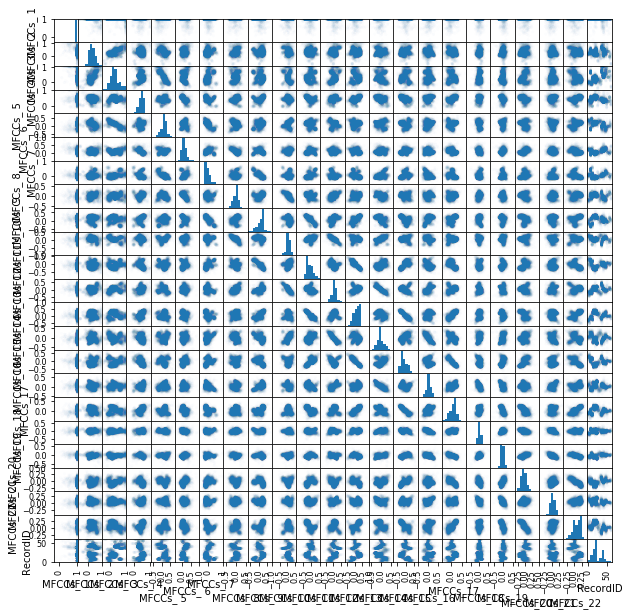

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

Матрица корреляций

In [18]:
data.corr()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,RecordID
MFCCs_ 1,1.000000,-0.264768,-0.308624,0.021448,0.188768,-0.218619,-0.071200,0.037503,-0.000191,0.049657,...,0.014050,-0.097434,0.010451,0.115724,-0.002011,-0.144825,-0.085469,0.072363,0.079368,-0.135785
MFCCs_ 2,-0.264768,1.000000,0.611001,-0.042378,-0.420759,0.047503,0.227932,0.232423,-0.040515,-0.226083,...,-0.006654,0.270655,-0.055596,-0.269448,0.050020,0.197618,0.129981,-0.036238,-0.201407,0.060317
MFCCs_ 3,-0.308624,0.611001,1.000000,0.029403,-0.756089,0.180192,0.435171,0.035504,-0.187901,-0.188196,...,-0.090214,0.209107,-0.024501,-0.191590,0.065077,0.229409,0.338848,-0.055124,-0.405719,0.490604
MFCCs_ 4,0.021448,-0.042378,0.029403,1.000000,0.173574,-0.611927,-0.399321,0.320716,0.445693,-0.103668,...,-0.366775,-0.539008,0.250611,0.552940,0.107670,-0.383491,-0.413988,0.233089,0.463047,-0.274889
MFCCs_ 5,0.188768,-0.420759,-0.756089,0.173574,1.000000,-0.116983,-0.698757,-0.068843,0.376587,0.150765,...,-0.111034,-0.193764,0.195593,0.180462,-0.136097,-0.154481,-0.291600,-0.015469,0.365276,-0.344341
MFCCs_ 6,-0.218619,0.047503,0.180192,-0.611927,-0.116983,1.000000,0.322164,-0.603540,-0.288668,0.184581,...,0.161294,0.401258,-0.065702,-0.444974,-0.225529,0.354775,0.456391,-0.174788,-0.443431,0.394360
MFCCs_ 7,-0.071200,0.227932,0.435171,-0.399321,-0.698757,0.322164,1.000000,-0.116446,-0.812516,0.093195,...,0.487558,0.423671,-0.455578,-0.401475,0.110193,0.233688,0.417053,-0.026791,-0.499355,0.157511
MFCCs_ 8,0.037503,0.232423,0.035504,0.320716,-0.068843,-0.603540,-0.116446,1.000000,0.342841,-0.666405,...,-0.261781,-0.145883,0.108638,0.171899,0.126920,-0.238918,-0.285313,0.189337,0.246922,-0.194459
MFCCs_ 9,-0.000191,-0.040515,-0.187901,0.445693,0.376587,-0.288668,-0.812516,0.342841,1.000000,-0.223024,...,-0.551479,-0.540109,0.497591,0.486216,-0.099750,-0.267932,-0.434309,0.040679,0.520056,-0.048597
MFCCs_10,0.049657,-0.226083,-0.188196,-0.103668,0.150765,0.184581,0.093195,-0.666405,-0.223024,1.000000,...,0.516843,-0.008003,-0.270764,0.011631,0.036676,0.071435,0.021804,-0.163389,-0.005355,-0.122777


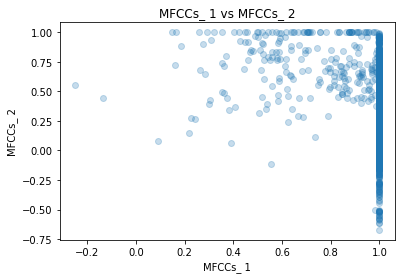

In [19]:
plt.plot(data['MFCCs_ 1'], data['MFCCs_ 2'], 'o', alpha = 0.25)
plt.xlabel('MFCCs_ 1')
plt.ylabel('MFCCs_ 2')
plt.title('MFCCs_ 1 vs MFCCs_ 2')
pass

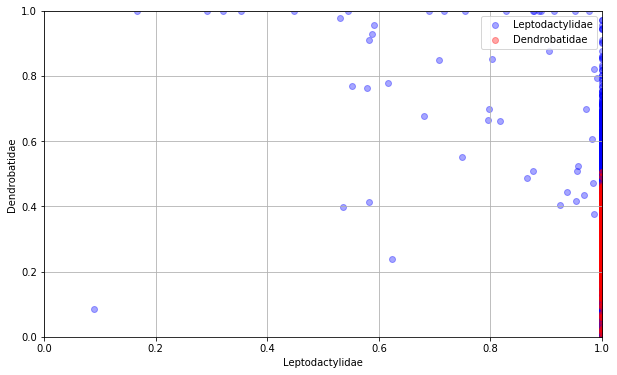

In [20]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['Family'] == 'Leptodactylidae']['MFCCs_ 1'],
            data[data['Family'] ==  'Leptodactylidae']['MFCCs_ 2'],
            alpha = 0.35,
            label = 'Leptodactylidae',
            color = 'b')

plt.scatter(data[data['Family'] == 'Dendrobatidae']['MFCCs_ 1'],
            data[data['Family'] == 'Dendrobatidae']['MFCCs_ 2'],
            alpha = 0.35,
            label = 'Dendrobatidae',
            color = 'r')

plt.xlabel('Leptodactylidae')
#plt.xticks(range(100))
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.ylabel('Dendrobatidae')
plt.legend()
plt.grid()

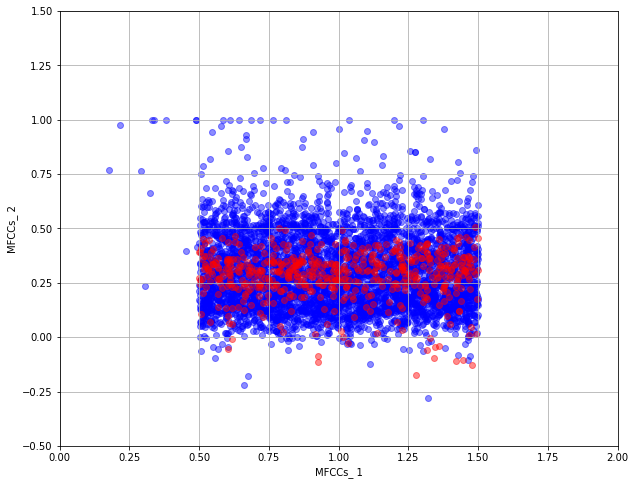

In [21]:
np.random.seed(0)
education_num_rnd = data['MFCCs_ 1'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(education_num_rnd[data['Family'] == 'Leptodactylidae'],
            data[data['Family'] == 'Leptodactylidae']['MFCCs_ 2'],
            alpha = 0.45,
            label = 'Leptodactylidae',
            color = 'b')

plt.scatter(education_num_rnd[data['Family'] == 'Dendrobatidae'],
            data[data['Family'] == 'Dendrobatidae']['MFCCs_ 2'],
            alpha = 0.45,
            label = 'Dendrobatidae',
            color = 'r')

plt.xlabel('MFCCs_ 1')
#plt.xticks(range(17))
plt.xlim(0, 2)
plt.ylim(-0.5, 1.5)
plt.ylabel('MFCCs_ 2')
plt.grid()

Параметры столбцов

In [22]:
data.describe(include = 'all')

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
count,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,...,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195,7195,7195,7195.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4,8,10,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4420,4150,3478,NaN
mean,0.989885,0.323584,0.311224,0.445997,0.127046,0.097939,-0.001397,-0.000370,0.128213,0.055998,...,0.088680,0.007755,-0.049474,-0.053244,0.037313,0.087567,NaN,NaN,NaN,25.220014
std,0.069016,0.218653,0.263527,0.160328,0.162722,0.120412,0.171404,0.116302,0.179008,0.127099,...,0.138055,0.084733,0.082546,0.094181,0.079470,0.123442,NaN,NaN,NaN,13.214399
min,-0.251179,-0.673025,-0.436028,-0.472676,-0.636012,-0.410417,-0.538982,-0.576506,-0.587313,-0.952266,...,-0.421480,-0.759322,-0.680745,-0.361649,-0.430812,-0.379304,NaN,NaN,NaN,1.000000
25%,1.000000,0.165945,0.138445,0.336737,0.051717,0.012581,-0.125737,-0.063109,0.004648,-0.001132,...,-0.001764,-0.042122,-0.106079,-0.120971,-0.017620,0.000533,NaN,NaN,NaN,15.000000
50%,1.000000,0.302184,0.274626,0.481463,0.161361,0.072079,-0.052630,0.013265,0.189317,0.063478,...,0.112769,0.011820,-0.052626,-0.055180,0.031274,0.105373,NaN,NaN,NaN,22.000000
75%,1.000000,0.466566,0.430695,0.559861,0.222592,0.175957,0.085580,0.075108,0.265395,0.117725,...,0.201932,0.061889,0.006321,0.001342,0.089619,0.194819,NaN,NaN,NaN,37.000000


Уникальные значения

In [23]:
data['Family'].unique()

array(['Leptodactylidae', 'Dendrobatidae', 'Hylidae', 'Bufonidae'], dtype=object)

In [24]:
data['MFCCs_ 1'].unique()

array([ 1.        ,  0.97104244,  0.92377304,  0.98501651,  0.53640065,
        0.79680018,  0.08977177,  0.58233048,  0.74948504,  0.95337924,
       -0.13674978,  0.44768792,  0.35214008,  0.68997601,  0.16612934,
        0.32053068,  0.62266067,  0.29128173,  0.90549633,  0.95184055,
        0.59064474,  0.87735882,  0.58189612,  0.816743  ,  0.5520415 ,
        0.98636452,  0.8032691 ,  0.61711204,  0.68035826,  0.79636632,
        0.87667737,  0.98106365,  0.70703513,  0.54428342,  0.97611469,
        0.88975052,  0.53082149,  0.58844743,  0.75512335,  0.88724934,
        0.82733238,  0.91372326,  0.57822278,  0.89369081,  0.98162765,
        0.91619739,  0.64874731,  0.57367167,  0.94754667,  0.90514988,
        0.35382846,  0.75641251,  0.98157764,  0.61857896,  0.54234856,
        0.70173702,  0.7969064 ,  0.86398431,  0.91757617,  0.97006481,
        0.98216369,  0.84620655,  0.55967211,  0.86467554,  0.63519907,
        0.97188702,  0.84765327,  0.89663921,  0.92289428,  0.85

In [25]:
for name in data['Family'].unique():
    print(name, data['Species'][data['Family'] == name].iloc[0])

Leptodactylidae AdenomeraAndre
Dendrobatidae Ameeregatrivittata
Hylidae HylaMinuta
Bufonidae Rhinellagranulosa


Готовим данные

In [26]:
data['MFCCs_ 1'].dtype.name

'float64'

In [27]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Family', 'Genus', 'Species']
['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6', 'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12', 'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18', 'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'MFCCs_22', 'RecordID']


In [28]:
for c in categorical_columns:
    print(c, data[c].unique())

Family ['Leptodactylidae' 'Dendrobatidae' 'Hylidae' 'Bufonidae']
Genus ['Adenomera' 'Ameerega' 'Dendropsophus' 'Hypsiboas' 'Leptodactylus'
 'Osteocephalus' 'Rhinella' 'Scinax']
Species ['AdenomeraAndre' 'Ameeregatrivittata' 'AdenomeraHylaedactylus'
 'HylaMinuta' 'HypsiboasCinerascens' 'HypsiboasCordobae'
 'LeptodactylusFuscus' 'OsteocephalusOophagus' 'Rhinellagranulosa'
 'ScinaxRuber']


Обрабатываем пропущенные значения

In [29]:
data.median(axis = 0)

MFCCs_ 1     1.000000
MFCCs_ 2     0.302184
MFCCs_ 3     0.274626
MFCCs_ 4     0.481463
MFCCs_ 5     0.161361
MFCCs_ 6     0.072079
MFCCs_ 7    -0.052630
MFCCs_ 8     0.013265
MFCCs_ 9     0.189317
MFCCs_10     0.063478
MFCCs_11    -0.153322
MFCCs_12     0.051054
MFCCs_13     0.196921
MFCCs_14    -0.050715
MFCCs_15    -0.143259
MFCCs_16     0.041081
MFCCs_17     0.112769
MFCCs_18     0.011820
MFCCs_19    -0.052626
MFCCs_20    -0.055180
MFCCs_21     0.031274
MFCCs_22     0.105373
RecordID    22.000000
dtype: float64

In [30]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [31]:
data[numerical_columns].count(axis = 0)

MFCCs_ 1    7195
MFCCs_ 2    7195
MFCCs_ 3    7195
MFCCs_ 4    7195
MFCCs_ 5    7195
MFCCs_ 6    7195
MFCCs_ 7    7195
MFCCs_ 8    7195
MFCCs_ 9    7195
MFCCs_10    7195
MFCCs_11    7195
MFCCs_12    7195
MFCCs_13    7195
MFCCs_14    7195
MFCCs_15    7195
MFCCs_16    7195
MFCCs_17    7195
MFCCs_18    7195
MFCCs_19    7195
MFCCs_20    7195
MFCCs_21    7195
MFCCs_22    7195
RecordID    7195
dtype: int64

нет пропущенных значений. Удалим столбцы, в котором записаны роды и виды, тк по ним предсказать семейство будет слишком просто

In [32]:
data = data.drop('Genus', axis = 1)
data = data.drop('Species', axis = 1)

In [33]:
data

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,1
5,1.0,0.099704,-0.033408,0.349895,0.344535,0.247569,0.022407,-0.213767,-0.127916,0.277353,...,0.180641,0.055242,-0.080487,-0.130089,-0.171478,-0.071569,0.077643,0.064903,Leptodactylidae,1
6,1.0,0.021676,-0.062075,0.318229,0.380439,0.179043,-0.041667,-0.252300,-0.167117,0.220027,...,0.216923,0.064853,-0.046620,-0.055146,-0.085972,-0.009127,0.065630,0.044040,Leptodactylidae,1
7,1.0,0.145130,-0.033660,0.284166,0.279537,0.175211,0.005791,-0.183329,-0.158483,0.192567,...,0.184266,0.075654,-0.055978,-0.048219,-0.056637,-0.022419,0.070085,0.021419,Leptodactylidae,1
8,1.0,0.271326,0.027777,0.375738,0.385432,0.272457,0.098192,-0.173730,-0.157857,0.207181,...,0.064425,-0.032167,-0.120723,-0.112607,-0.156933,-0.118527,-0.002471,0.002304,Leptodactylidae,1
9,1.0,0.120565,-0.107235,0.316555,0.364437,0.307757,0.025992,-0.294179,-0.223236,0.268435,...,0.236484,0.053436,-0.051073,-0.052568,-0.111338,-0.040014,0.090204,0.088025,Leptodactylidae,1


In [34]:
y = data['Family']

Векторизация

In [35]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Family']
['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6', 'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12', 'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18', 'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'MFCCs_22', 'RecordID']


In [36]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [37]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['Family']


In [38]:
data['Family'].unique()

array(['Leptodactylidae', 'Dendrobatidae', 'Hylidae', 'Bufonidae'], dtype=object)

In [39]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Family_Bufonidae', 'Family_Dendrobatidae', 'Family_Hylidae',
       'Family_Leptodactylidae'],
      dtype='object')


In [40]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,RecordID
count,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,...,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000
mean,0.989885,0.323584,0.311224,0.445997,0.127046,0.097939,-0.001397,-0.000370,0.128213,0.055998,...,-0.039244,-0.101748,0.042062,0.088680,0.007755,-0.049474,-0.053244,0.037313,0.087567,25.220014
std,0.069016,0.218653,0.263527,0.160328,0.162722,0.120412,0.171404,0.116302,0.179008,0.127099,...,0.152515,0.187618,0.119915,0.138055,0.084733,0.082546,0.094181,0.079470,0.123442,13.214399
min,-0.251179,-0.673025,-0.436028,-0.472676,-0.636012,-0.410417,-0.538982,-0.576506,-0.587313,-0.952266,...,-0.590380,-0.717156,-0.498675,-0.421480,-0.759322,-0.680745,-0.361649,-0.430812,-0.379304,1.000000
25%,1.000000,0.165945,0.138445,0.336737,0.051717,0.012581,-0.125737,-0.063109,0.004648,-0.001132,...,-0.132980,-0.255929,-0.019549,-0.001764,-0.042122,-0.106079,-0.120971,-0.017620,0.000533,15.000000
50%,1.000000,0.302184,0.274626,0.481463,0.161361,0.072079,-0.052630,0.013265,0.189317,0.063478,...,-0.050715,-0.143259,0.041081,0.112769,0.011820,-0.052626,-0.055180,0.031274,0.105373,22.000000
75%,1.000000,0.466566,0.430695,0.559861,0.222592,0.175957,0.085580,0.075108,0.265395,0.117725,...,0.039157,0.017348,0.107046,0.201932,0.061889,0.006321,0.001342,0.089619,0.194819,37.000000
max,1.000000,1.000000,1.000000,1.000000,0.752246,0.964240,1.000000,0.551762,0.738033,0.522768,...,0.575749,0.668924,0.670700,0.681157,0.614064,0.574209,0.467831,0.389797,0.432207,60.000000


In [41]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [42]:
data_numerical.describe()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,RecordID
count,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,...,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03
mean,-7.745082e-15,-3.765161e-15,3.763617e-15,-8.975231e-15,1.042175e-16,-1.325972e-15,-5.736127e-16,-3.497781e-16,-2.269978e-16,3.361916e-16,...,-3.691858e-16,-2.001025e-16,-5.616772e-16,1.065247e-15,4.604455e-17,-7.109748e-16,3.018202e-16,2.335403e-16,2.149188e-15,-3.140041e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.798238e+01,-4.557943e+00,-2.835577e+00,-5.729977e+00,-4.689329e+00,-4.221812e+00,-3.136361e+00,-4.953788e+00,-3.997167e+00,-7.932874e+00,...,-3.613666e+00,-3.280110e+00,-4.509325e+00,-3.695332e+00,-9.052862e+00,-7.647555e+00,-3.274613e+00,-5.890601e+00,-3.782120e+00,-1.832850e+00
25%,1.465677e-01,-7.209533e-01,-6.556397e-01,-6.814836e-01,-4.629283e-01,-7.088809e-01,-7.254231e-01,-5.394463e-01,-6.902740e-01,-4.494930e-01,...,-6.146064e-01,-8.217846e-01,-5.137848e-01,-6.551290e-01,-5.886445e-01,-6.857498e-01,-7.191165e-01,-6.912451e-01,-7.050669e-01,-7.733998e-01
50%,1.465677e-01,-9.787170e-02,-1.388800e-01,2.212111e-01,2.108779e-01,-2.147621e-01,-2.989014e-01,1.172380e-01,3.413458e-01,5.884947e-02,...,-7.521297e-02,-2.212540e-01,-8.180428e-03,1.744879e-01,4.797379e-02,-3.818442e-02,-2.055800e-02,-7.599550e-02,1.442390e-01,-2.436746e-01
75%,1.465677e-01,6.539236e-01,4.533511e-01,7.101958e-01,5.871688e-01,6.479245e-01,5.074365e-01,6.489791e-01,7.663403e-01,4.856602e-01,...,5.140566e-01,6.347787e-01,5.419146e-01,8.203330e-01,6.388694e-01,6.759239e-01,5.795847e-01,6.581817e-01,8.688409e-01,8.914508e-01
max,1.465677e-01,3.093556e+00,2.613680e+00,3.455444e+00,3.842128e+00,7.194484e+00,5.842318e+00,4.747398e+00,3.406653e+00,3.672477e+00,...,4.032354e+00,4.107663e+00,5.242350e+00,4.291591e+00,7.155520e+00,7.555622e+00,5.532723e+00,4.435434e+00,2.791917e+00,2.631976e+00


In [43]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)
#print data.columns

(7195, 27)


In [44]:
data.describe()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,RecordID,Family_Bufonidae,Family_Dendrobatidae,Family_Hylidae,Family_Leptodactylidae
count,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,...,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7195.000000,7195.000000,7195.000000,7195.000000
mean,-7.745082e-15,-3.765161e-15,3.763617e-15,-8.975231e-15,1.042175e-16,-1.325972e-15,-5.736127e-16,-3.497781e-16,-2.269978e-16,3.361916e-16,...,4.604455e-17,-7.109748e-16,3.018202e-16,2.335403e-16,2.149188e-15,-3.140041e-15,0.009451,0.075330,0.300903,0.614315
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.096763,0.263942,0.458683,0.486790
min,-1.798238e+01,-4.557943e+00,-2.835577e+00,-5.729977e+00,-4.689329e+00,-4.221812e+00,-3.136361e+00,-4.953788e+00,-3.997167e+00,-7.932874e+00,...,-9.052862e+00,-7.647555e+00,-3.274613e+00,-5.890601e+00,-3.782120e+00,-1.832850e+00,0.000000,0.000000,0.000000,0.000000
25%,1.465677e-01,-7.209533e-01,-6.556397e-01,-6.814836e-01,-4.629283e-01,-7.088809e-01,-7.254231e-01,-5.394463e-01,-6.902740e-01,-4.494930e-01,...,-5.886445e-01,-6.857498e-01,-7.191165e-01,-6.912451e-01,-7.050669e-01,-7.733998e-01,0.000000,0.000000,0.000000,0.000000
50%,1.465677e-01,-9.787170e-02,-1.388800e-01,2.212111e-01,2.108779e-01,-2.147621e-01,-2.989014e-01,1.172380e-01,3.413458e-01,5.884947e-02,...,4.797379e-02,-3.818442e-02,-2.055800e-02,-7.599550e-02,1.442390e-01,-2.436746e-01,0.000000,0.000000,0.000000,1.000000
75%,1.465677e-01,6.539236e-01,4.533511e-01,7.101958e-01,5.871688e-01,6.479245e-01,5.074365e-01,6.489791e-01,7.663403e-01,4.856602e-01,...,6.388694e-01,6.759239e-01,5.795847e-01,6.581817e-01,8.688409e-01,8.914508e-01,0.000000,0.000000,1.000000,1.000000
max,1.465677e-01,3.093556e+00,2.613680e+00,3.455444e+00,3.842128e+00,7.194484e+00,5.842318e+00,4.747398e+00,3.406653e+00,3.672477e+00,...,7.155520e+00,7.555622e+00,5.532723e+00,4.435434e+00,2.791917e+00,2.631976e+00,1.000000,1.000000,1.000000,1.000000


Х и У

In [45]:
X = data
feature_names = X.columns

In [46]:
type(feature_names)

pandas.core.indexes.base.Index

In [47]:
feature_names

Index(['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6',
       'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12',
       'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18',
       'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'MFCCs_22', 'RecordID',
       'Family_Bufonidae', 'Family_Dendrobatidae', 'Family_Hylidae',
       'Family_Leptodactylidae'],
      dtype='object')

In [48]:
print(X.shape)
print(y.shape)
N, d = X.shape

(7195, 27)
(7195,)


In [49]:
type(X)

pandas.core.frame.DataFrame

In [50]:
type(y)

pandas.core.series.Series

Разделим на обучающую и тестовую выборку. Размер тестовой выборки - 30%

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

5036 2159


In [52]:
5036+2159

7195

kNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [54]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [55]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.0049642573471 0.00741083835109


In [56]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ

In [57]:
err_test

0.0074108383510884668

In [58]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[  25    0    2    0]
 [   0  162    0    0]
 [   0    0  620    3]
 [   0    1   10 1336]]


In [59]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]], dtype=int64)

Подбор параметров

In [60]:
# Долго!
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.0037728355838 1


In [61]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.0 0.00416859657249
